In [2]:
from astropy.io import ascii, fits
from astropy.table import Table
from ginga.util import zscale
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from photutils import CircularAperture, RectangularAperture, aperture_photometry

In [17]:
drc = '/Users/cshanahan/Desktop/clean_desktop/WD_acs/data/cmd_p9/F625W/jcmdp9030_drc.fits'
sci = fits.open(drc)[1].data
wht = fits.open(drc)[2].data
ctx = fits.open(drc)[3].data
photcat = ascii.read('/Users/cshanahan/Desktop/clean_desktop/WD_acs/data/cmd_p9/F625W/jcmdp9030_drc_photcat.dat')

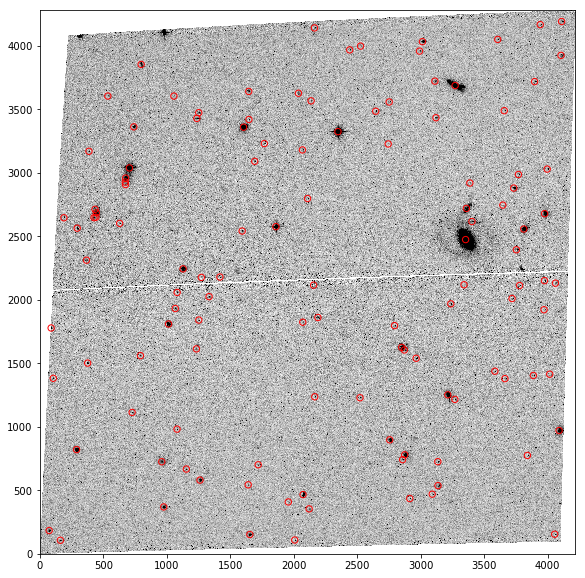

In [18]:
plt.figure(figsize = (10,10))
v1, v2 = zscale.zscale(sci)
plt.imshow(sci, vmin=v1, vmax=v2, cmap='Greys',origin='lower')
plt.scatter(photcat['xcenter'],photcat['ycenter'], facecolor='None', edgecolor='r', s=40)

In [12]:
np.percentile(sci[~np.isnan(sci)], 50)


0.00074213469633832574

In [30]:
nims = fits.getval(drc, 'ndrizim') / 2. 
sums = []
xxs = []
yys = [] 
for i, f in enumerate(photcat):
    xx, yy = f['xcenter'], f['ycenter']
    ap = RectangularAperture((xx, yy), w=5, h=5.)
    ap_phot = aperture_photometry(nimages_array, ap)
    summ = ap_phot['aperture_sum'][0]
    if summ/ap.area() >= nims * 0.9:
        sums.append(summ)
        xxs.append(xx)
        yys.append(yy)
    

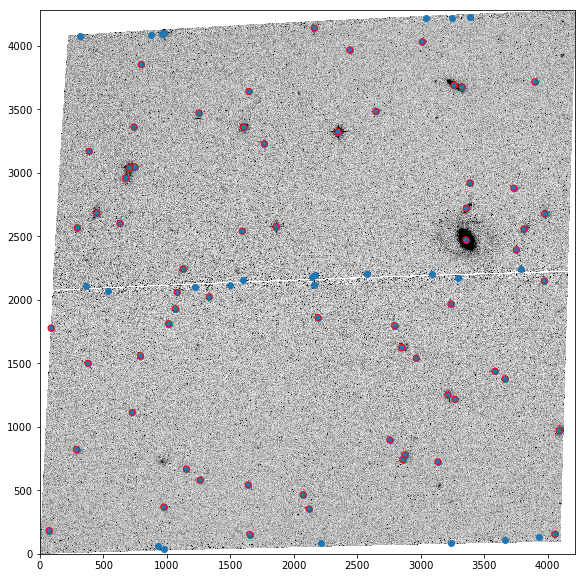

In [31]:
plt.figure(figsize = (10,10))
plt.imshow(sci, origin = 'lower', cmap = 'Greys', vmin = v1, vmax = v2)
plt.scatter(photcat['xcenter'], photcat['ycenter'])
plt.scatter(xxs, yys, facecolor = 'None', edgecolor = 'r')

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(sci, photcat['xcenter'], photcat['ycenter'])